In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 


In [17]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:

logistic = LogisticRegression(
    multi_class='multinomial',                
    max_iter=200,                
    random_state=0               
)


logistic.fit(X_train, Y_train)

X_train_pred = logistic.predict(X_train)
X_test_pred = logistic.predict(X_test)

train_accuracy = accuracy_score(Y_train, X_train_pred)
test_accuracy = accuracy_score(Y_test, X_test_pred)

print(f"Train Accuracy: {train_accuracy:}")
print(f"Test Accuracy: {test_accuracy:}")




Train Accuracy: 0.9666666666666667
Test Accuracy: 1.0


In [22]:

print("Classification Report - Training Set:")
print(classification_report(Y_train, X_train_pred, target_names=label.classes_))


print("Classification Report - Testing Set:")
print(classification_report(Y_test, X_test_pred, target_names=label.classes_))


Classification Report - Training Set:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.93      0.95        40
 Iris-virginica       0.93      0.97      0.95        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120

Classification Report - Testing Set:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



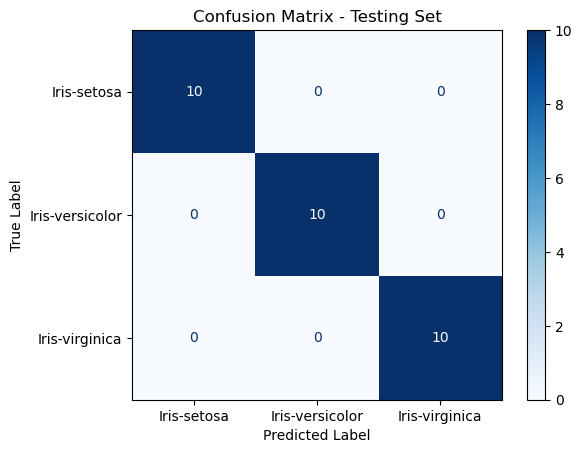

In [23]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=label.classes_)
Matrix.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:

param = {
    'C': [0.01, 0.1, 1, 10, 100],        
    'penalty': ['l2'],                    
    'solver': ['lbfgs', 'saga'],          
    'max_iter': [100, 200, 300]         
}



In [ ]:

grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=param,
    cv=5,                       
    scoring='accuracy',
    n_jobs=-1,                  
    verbose=2                   
)


grid_search.fit(X_train, Y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy', verbose=2)

In [26]:
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:}")


Best Parameters from GridSearchCV: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.975


In [27]:

best_log_reg = grid_search.best_estimator_

X_train_pred_best = best_log_reg.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")



Train Accuracy with Best Parameters: 0.9750


In [28]:
X_test_pred_best = best_log_reg.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Test Accuracy with Best Parameters: 1.0000


In [29]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=label.classes_))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=label.classes_))



Classification Report - Training Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.95      0.96        40
 Iris-virginica       0.95      0.97      0.96        40

       accuracy                           0.97       120
      macro avg       0.98      0.97      0.97       120
   weighted avg       0.98      0.97      0.97       120

Classification Report - Testing Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



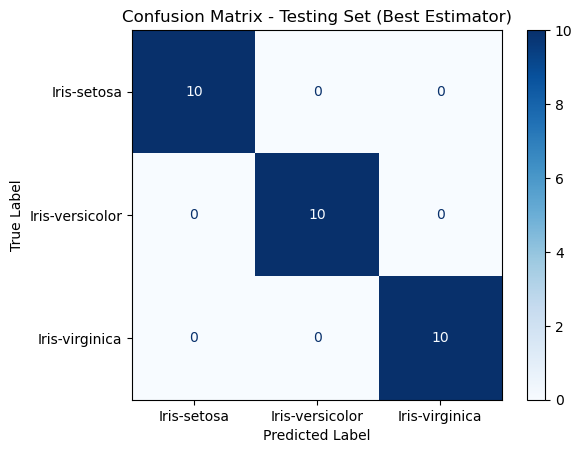

In [30]:
conf_mat_best = confusion_matrix(Y_test, X_test_pred_best)
Matrix_best = ConfusionMatrixDisplay(confusion_matrix=conf_mat_best, display_labels=label.classes_)
Matrix_best.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Testing Set (Best Estimator)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
1